# Nodes and electrodes distance

In [1]:
import os
import sys
import time
import errno
import time
import timeit


import numpy as np
import scipy as scp
import scipy as scp
import matplotlib.pyplot as plt
import matplotlib as mpl

import re
import pandas as pd
import seaborn as sns

In [2]:
from scipy.spatial import distance


In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
%pylab inline
#%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from IPython.display import HTML

In [6]:
cwd = os.getcwd()
cwd

'/data/SBI/BVEP_SBI'

In [7]:
Mainpath=cwd+'/'

In [8]:
contacts = []
seeg_idxs = []
channel_idx = 0
contacts_labels = []

with open(Mainpath+ 'ExperimentalData_CJ/complex.ades', 'r') as fd:
    for line in fd.readlines():
        parts = [p.strip() for p in line.strip().split('=')]
        if len(parts)>1 and parts[1] == 'SEEG':
            name, idx = re.match("([A-Za-z]+[']*)([0-9]+)", parts[0]).groups()
            idx = int(idx)
            contacts.append((name, idx))             
            seeg_idxs.append(channel_idx)
            contacts_labels.append(parts[0].upper())
            
            channel_idx += 1

In [9]:
bipnames = []
bipidx = []
for i in range(len(contacts)-1):
    (ln, li), (rn, ri) = contacts[i:i+2]
    if ln != rn:
        continue
    bipnames.append('%s%d-%d' % (ln, li, ri))
    bipidx.append((i, i+1))

In [10]:
contacts = []
with open(Mainpath+ 'ExperimentalData_CJ/complex_raw.ades', 'r') as fd:
    for line in fd.readlines():
        parts = [p.strip() for p in line.strip().split('=')]
        if len(parts)>1 and parts[1] == 'SEEG':
            name, idx = re.match("([A-Z]+[a-z]*[']*)([0-9]+)", parts[0]).groups()
            idx = int(idx)
            contacts.append((name, idx)) 

In [11]:
reg_xyz = loadtxt(Mainpath+ 'ExperimentalData_CJ/centers.txt', usecols=(1,2,3))
reg_names = []
with open(Mainpath+ 'ExperimentalData_CJ/centers.txt', 'r') as fd:
    #for line in fd.readlines():
     #   reg_names.append(line.strip().split()[0])
    for i, line in enumerate(fd.readlines()):
        reg_names.append('r%03d-%s' % (i, line.strip().split()[0]))
#seg = nibabel.load('aparcaseg_2_diff_2.nii.gz')
#reg_xyz = seg.affine.dot(c_[reg_xyz, ones((reg_xyz.shape[0], ))].T)[:3].T


In [12]:
seeg_labels = []
seeg_xyz = loadtxt(Mainpath+ 'ExperimentalData_CJ/elecs_name.txt', usecols=(1,2,3))
with open(Mainpath+ 'ExperimentalData_CJ/elecs_name.txt', 'r') as fd:
    for line in fd.readlines():
        parts = line.strip().split()
        seeg_labels.append(parts[0].upper())
#print sorted(seeg_labels+[e+str(i) for e, i in contacts])
monopolar_chan_to_pos = []
for name, idx in contacts:
    monopolar_chan_to_pos.append(seeg_labels.index(name+str(idx)))
seeg_xyz = array([seeg_xyz[i] for i in monopolar_chan_to_pos])


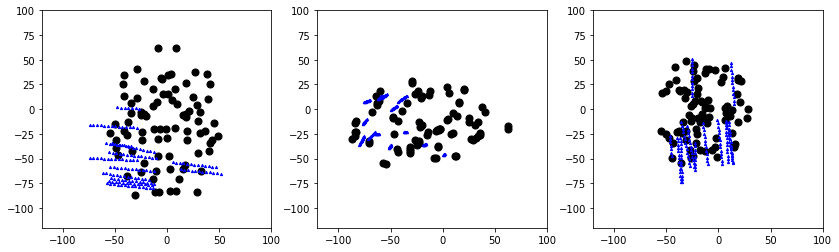

In [13]:
def plot_electrodes():
    x, y, z = zip(reg_xyz.T, seeg_xyz.T)
    for i, ((ra, sa), (rb, sb)) in enumerate([(x, y), (y, z), (z, x)]):
        subplot(1, 3, i + 1)
        scatter(ra, rb, color='k', s=50)
        scatter(sa, sb ,color='b',marker='^', s=5 )
        axis([-120, 100, -120, 100])
        #xticks([]), yticks([])
figure(figsize=(14, 4))
plot_electrodes()
plt.show()

In [14]:
elecnames=[]
electrodes = {}  
with open(Mainpath+ 'ExperimentalData_CJ/elecs_name.txt', 'r') as fd:
            for i, line in enumerate(fd.readlines()):
                line = line.strip()
                contact, x, y, z = line.split()
                elecnames.append(contact)
                name, _ = re.match("([A-Za-z]+[']*)([0-9]+)", contact).groups()
                if name in electrodes:
                    electrodes[name].append(i)
                else:
                    electrodes[name] = [i]
                    

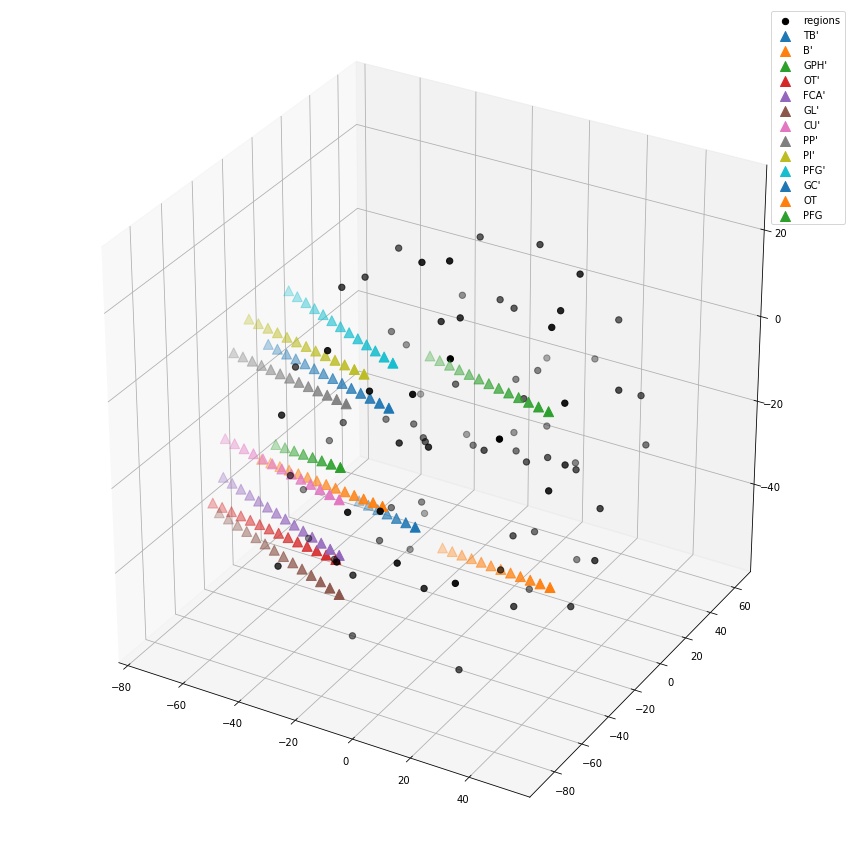

In [15]:
 
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reg_xyz [:, 0], reg_xyz [:, 1], reg_xyz [:, 2], color='k', s=40, label='regions')


for name, idxs in electrodes.items():
    ax.scatter(seeg_xyz [idxs, 0], seeg_xyz [idxs, 1], seeg_xyz [idxs, 2],marker='^', s=100, label=name)
    

plt.legend()
plt.tight_layout()
plt.show()    

In [16]:
selectednodes=array([ 5,  6,  11,  27, 34]) #nodes
r_selectednodes=reg_xyz[selectednodes]

Ps=array([] ) #contacts

selectedcontacts=[bipnames[c] for c in Ps]

ss=[]
sss=[]
for s in selectedcontacts:
    parts = s.strip().split('-')
    name, idx=re.match("([A-Za-z]+[']*)([0-9]+)", s).groups()
    idx = int(idx)
    #sss.append((name, idx))
    ss.append(parts[0].upper())
    
    
selectedcontacts_indices=[contacts_labels.index(c) for c in ss] 
r_selectedcontacts=seeg_xyz[selectedcontacts_indices]


In [17]:
print(selectedcontacts)

[]


In [18]:
def plot_selected_electrodes():
    x, y, z = zip(reg_xyz.T, seeg_xyz.T)
    for i, ((ra, sa), (rb, sb)) in enumerate([(x, y), (y, z), (z, x)]):
        subplot(1, 3, i + 1)
        scatter(ra, rb, color='k', s=50)
        scatter(sa, sb ,color='b',marker='^', s=5 )
    x, y, z = zip(r_selectednodes.T, r_selectedcontacts.T)
    for i, ((ra, sa), (rb, sb)) in enumerate([(x, y), (y, z), (z, x)]):
        subplot(1, 3, i + 1)
        scatter(ra, rb,color='r', s=50)
        scatter(sa, sb, color='r',marker='^', s=20)
        axis([-120, 100, -120, 100])
        #xticks([]), yticks([])

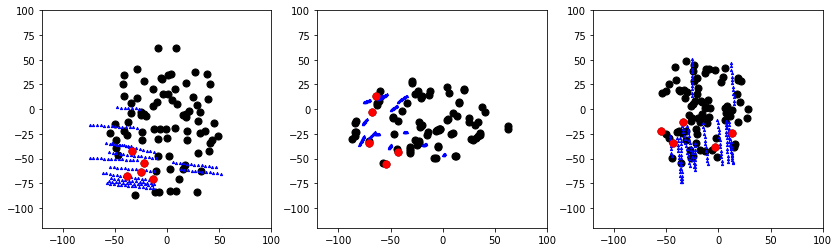

In [19]:
figure(figsize=(14, 4))
plot_selected_electrodes()
plt.show()

In [20]:
nn=reg_xyz.shape[0]
ns=seeg_xyz.shape[0]

nn, ns

(84, 162)

In [21]:
dst=np.zeros((nn, ns))

In [22]:
for i in range(0, nn):
    for j in range(0, ns):
        dst[i,j] = distance.euclidean(reg_xyz[i,: ], seeg_xyz[j,: ])

In [23]:
dist_best=np.min(dst, axis=1)

In [24]:
dist_best.shape

(84,)

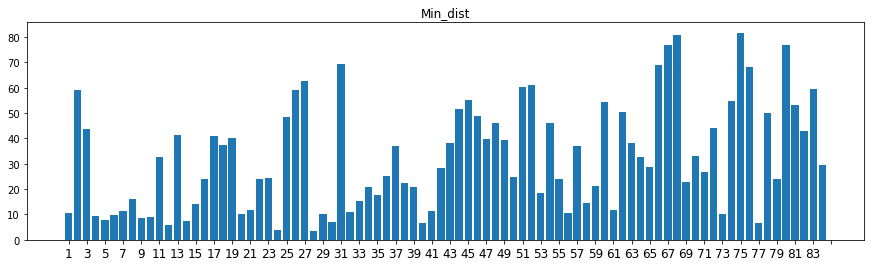

In [25]:
plt.figure(figsize=(15, 4))
plt.bar(np.r_[0:nn], dist_best)
plt.title('Min_dist')
plt.xticks(np.arange(0,nn+2, step=2),np.arange(1, nn+1, step=2), fontsize=12, rotation=0)
plt.savefig(os.path.join(cwd+"/Figs","Distances.png"), doi=800)
plt.show()

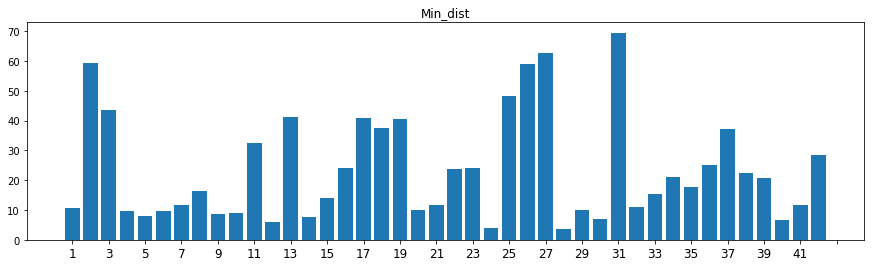

In [26]:
plt.figure(figsize=(15, 4))
plt.bar(np.r_[0:42], dist_best[0:42])
plt.title('Min_dist')
plt.xticks(np.arange(0,42+2, step=2),np.arange(1, 42+1, step=2), fontsize=12, rotation=0)
plt.savefig(os.path.join(cwd+"/Figs","Distances_hem.png"), doi=800)
plt.show()

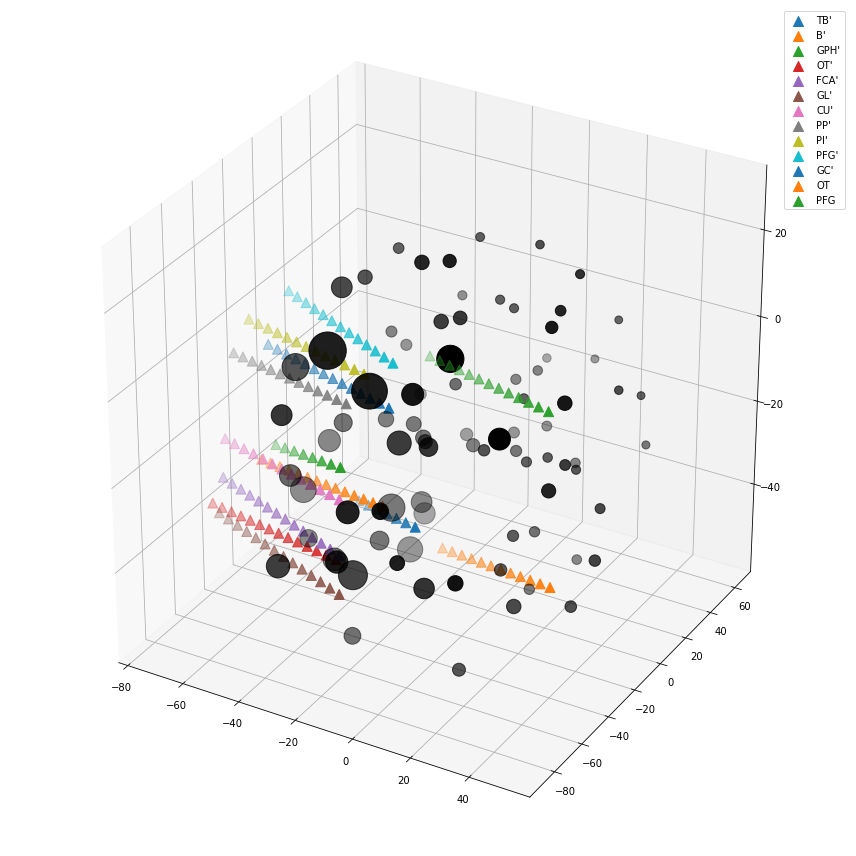

In [27]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reg_xyz [:, 0], reg_xyz [:, 1], reg_xyz [:, 2], color='k', s=5000./dist_best)


for name, idxs in electrodes.items():
    ax.scatter(seeg_xyz [idxs, 0], seeg_xyz [idxs, 1], seeg_xyz [idxs, 2],marker='^', s=100, label=name)
    

plt.legend()
plt.tight_layout()
plt.show()    

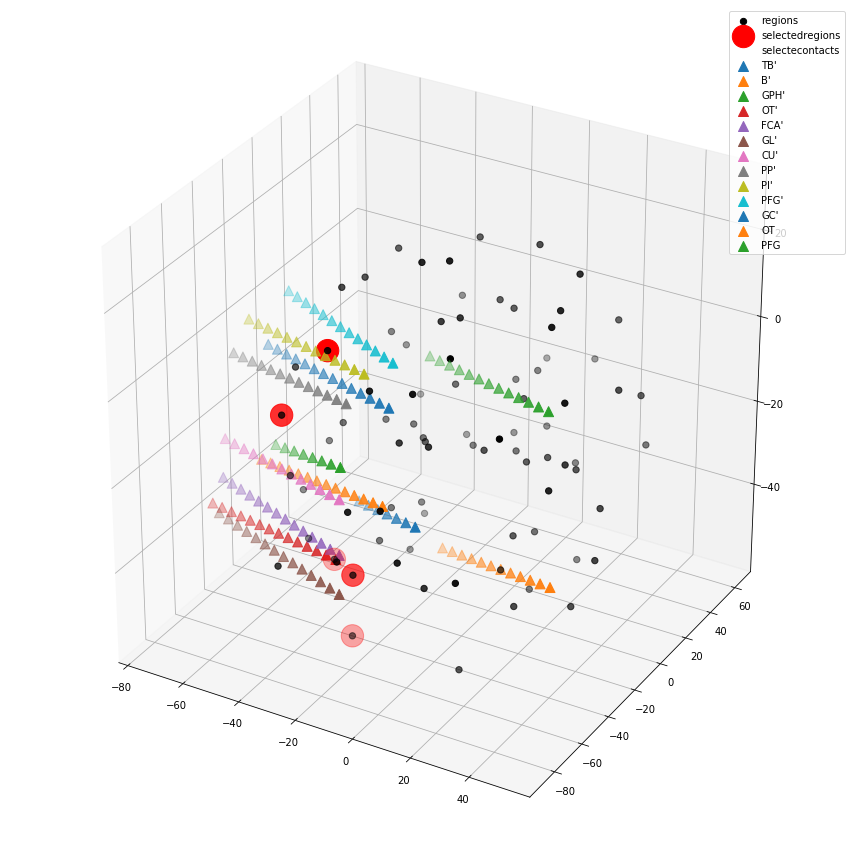

In [28]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reg_xyz [:, 0], reg_xyz [:, 1], reg_xyz [:, 2], color='k', s=40, label='regions')
ax.scatter(r_selectednodes [:, 0], r_selectednodes [:, 1], r_selectednodes [:, 2], color='red', s=500, label='selectedregions')
ax.scatter(r_selectedcontacts [:, 0], r_selectedcontacts [:, 1], r_selectedcontacts [:, 2], color='',marker='^', s=300, label='selectecontacts')


for name, idxs in electrodes.items():
    ax.scatter(seeg_xyz [idxs, 0], seeg_xyz [idxs, 1], seeg_xyz [idxs, 2],marker='^', s=100, label=name)
    

plt.legend()
plt.tight_layout()
plt.show()    

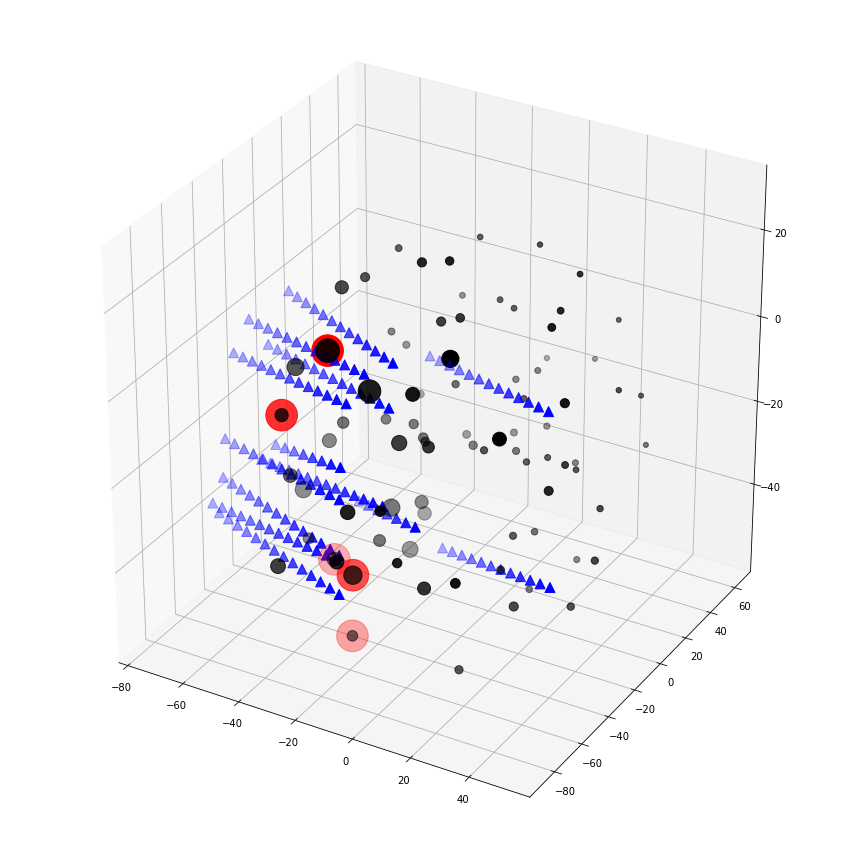

In [29]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reg_xyz [:, 0], reg_xyz [:, 1], reg_xyz [:, 2], color='k', s=2000./dist_best,  label='regions')
#ax.scatter(reg_xyz [:, 0], reg_xyz [:, 1], reg_xyz [:, 2], color='k', s=40, label='regions')
ax.scatter(r_selectednodes [:, 0], r_selectednodes [:, 1], r_selectednodes [:, 2], color='r', s=1000, label='selectedregions')
ax.scatter(r_selectedcontacts [:, 0], r_selectedcontacts [:, 1], r_selectedcontacts [:, 2], color='cyan',marker='^', s=300, label='selectecontacts')

    

for name, idxs in electrodes.items():
    ax.scatter(seeg_xyz [idxs, 0], seeg_xyz [idxs, 1], seeg_xyz [idxs, 2],marker='^', color='b', s=100, label=name)
    

#plt.legend()
plt.tight_layout()
plt.show()    